<a href="https://colab.research.google.com/github/rajy4683/EVAP2/blob/master/P2S3_FaceAlignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import sys

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


### Dependencies


In [ ]:
%run '/content/drive/My Drive/EVA4/default_setup.py'

Installing mandatory requirements
Installing albumentations
System imports completed


  pip install torch-lr-finder -v --global-option="amp"
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Dev imports completed


In [ ]:
sys.path.append("/content/drive/My Drive/EVA4/ExternalLibs")

In [ ]:
import dlib
import cv2
import numpy as np
import faceBlendCommon as fbc
import matplotlib



In [ ]:
%matplotlib inline
matplotlib.rcParams['figure.figsize']= (6.0,6.0)
matplotlib.rcParams['image.cmap']='gray'

def writeLandMarksToFile(landmarks, landmarksFileName):
    with open(landmarksFileName,  'w') as f:
        for p in landmarks.parts():
            f.write("%s %s\n" %(int(p.x), int(p.y)))
        f.close()

In [ ]:
MODEL_PATH = '/content/'
PREDICTOR_PATH ='/content/shape_predictor_68_face_landmarks.dat'

In [ ]:
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2

--2020-08-13 17:33:47--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  19.4MB/s    in 3.1s    

2020-08-13 17:33:50 (19.4 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]



In [ ]:
!bzip2 -dk /content/shape_predictor_68_face_landmarks.dat.bz2

bzip2: Output file /content/shape_predictor_68_face_landmarks.dat already exists.


In [ ]:
faceDetector = dlib.get_frontal_face_detector()
landmarkDetector = dlib.shape_predictor(PREDICTOR_PATH)
imageFileName = '/content/ivankatilt.jpg'
landmarksBasename = "results"
im = cv2.imread(imageFileName)

In [ ]:
im = (Image.open(imageFileName))
faceRects = faceDetector(np.array(im), 0)

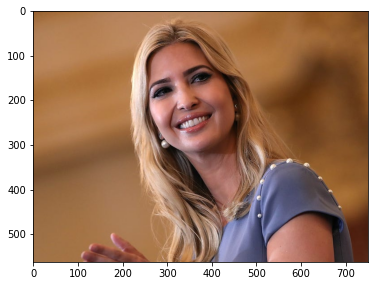

In [ ]:
plt.imshow(im[:,:,::-1])
plt.show()

In [ ]:
faceRects = faceDetector(im, 0)
print("Number of faces detected:{}".format(len(faceRects)))
landmarksAll = []

Number of faces detected:4


In [ ]:
from renderFace import renderFace, renderFace2

In [ ]:
for i in range(0, len(faceRects)):
    newRect = dlib.rectangle(int(faceRects[i].left()),
                             int(faceRects[i].top()),
                             int(faceRects[i].right()),
                             int(faceRects[i].bottom()))
    landmarks = landmarkDetector(im, newRect)
    if (i == 0):
        print("Number of landmarks:{}".format(len(landmarks.parts())))
    landmarksAll.append(landmarks)
    renderFace2(im, landmarks)
    landmarksFileName = landmarksBasename+"_"+str(i)+".txt"
    print("Saving landmarks to {}".format(landmarksFileName))
    writeLandMarksToFile(landmarks, landmarksFileName)

Number of landmarks:68
Saving landmarks to results_0.txt
Saving landmarks to results_1.txt
Saving landmarks to results_2.txt
Saving landmarks to results_3.txt


In [ ]:
landmarks

In [ ]:
outputFileName = "landmarkstest.jpg"
cv2.imwrite(outputFileName, im)

True

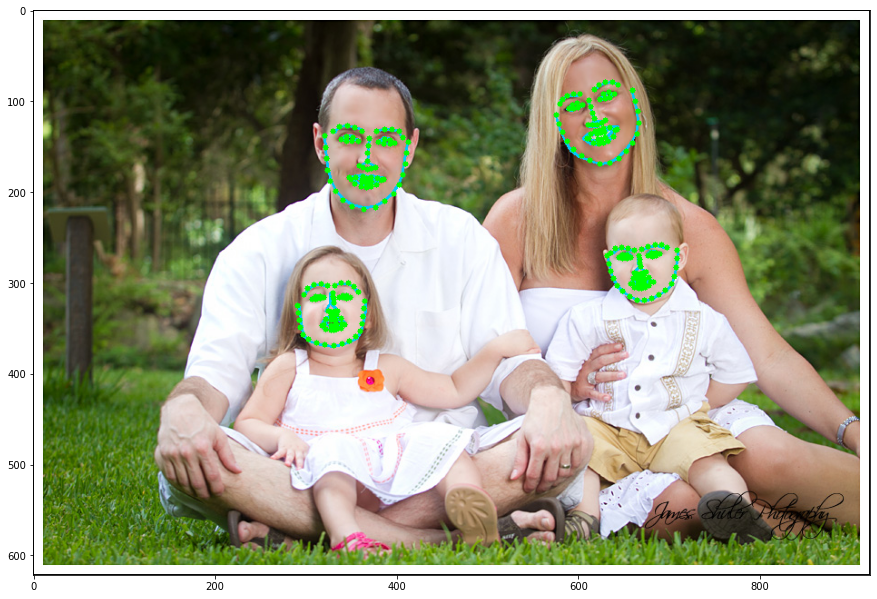

In [ ]:
plt.figure(figsize=(15,15))
plt.imshow(im[:,:,::-1])
plt.show()

In [ ]:
def drawPolyline(im, landmarks, start, end, isClosed=False):
  points = []
  for i in range(start, end+1):
    point = [landmarks.part(i).x, landmarks.part(i).y]
    points.append(point)

  points = np.array(points, dtype=np.int32)
  cv2.polylines(im, [points], isClosed, (255, 200, 0), thickness=2, lineType=cv2.LINE_8)

In [ ]:
renderFace2(im, )

In [ ]:
len(glob.glob("/content/drive/My Drive/*jpg"))

1031

### 5 point detector

In [ ]:
faceRects = faceDetector(im, 0)
print("Number of faces detected:{}".format(len(faceRects)))
landmarksAll = []

Number of faces detected:1


In [ ]:
for i in range(0, len(faceRects)):
    newRect = dlib.rectangle(int(faceRects[i].left()),
                             int(faceRects[i].top()),
                             int(faceRects[i].right()),
                             int(faceRects[i].bottom()))
    landmarks = landmarkDetector(im, newRect)
    if (i == 0):
        print("Number of landmarks:{}".format(len(landmarks.parts())))
    landmarksAll.append(landmarks)
    renderFace2(im, landmarks)
    landmarksFileName = landmarksBasename+"_"+str(i)+".txt"
    print("Saving landmarks to {}".format(landmarksFileName))
    writeLandMarksToFile(landmarks, landmarksFileName)

Number of landmarks:5
Saving landmarks to results_0.txt


In [ ]:
outputFileName = "landmarkstest2.jpg"
cv2.imwrite(outputFileName, im)

True

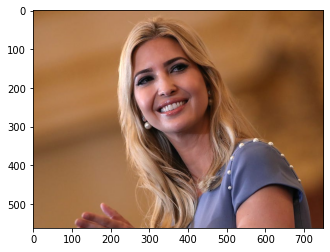

In [ ]:
import dlib
import cv2
import faceBlendCommon as fbc
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#PREDICTOR_PATH="/content/shape_predictor_5_face_landmarks.dat"
PREDICTOR_PATH="/content/shape_predictor_68_face_landmarks.dat"

faceDetector = dlib.get_frontal_face_detector()
landmarkDetector = dlib.shape_predictor(PREDICTOR_PATH)
imageFileName = '/content/ivankatilt.jpg'
landmarksBasename = "results"
im = cv2.imread(imageFileName)
plt.imshow(im[:,:,::-1])
plt.show()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


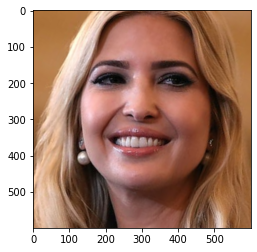

In [ ]:
%load_ext autoreload
%autoreload 2
import faceBlendCommon as fbc 
points = fbc.getLandmarks(faceDetector, landmarkDetector, im)
points = np.array(points)
im = np.float32(im)/255.0



h=w=600
imNorm, points = fbc.normalizeImagesAndLandmarks((h,w), im, points)
imNorm = np.uint8(imNorm * 255)
plt.imshow(imNorm[:,:,::-1])
plt.show()
